<a href="https://colab.research.google.com/github/jangalasriramd7/MachineLearning/blob/main/Clustering%20of%20tissue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
data = pd.read_excel('DB_Tissue.xls', sheet_name = 1)
print(data.head())

   Case # Class          I0  ...     Max IP          DR           P
0       1   car  524.794072  ...  60.204880  220.737212  556.828334
1       2   car  330.000000  ...  69.717361   99.084964  400.225776
2       3   car  551.879287  ...  77.793297  253.785300  656.769449
3       4   car  380.000000  ...  88.758446  105.198568  493.701814
4       5   car  362.831266  ...  69.389389  103.866552  424.796503

[5 rows x 11 columns]


In [ ]:
data.describe()

,Case #,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,53.500000,784.251618,0.120133,0.114691,190.568642,7335.155162,23.473784,75.381258,166.710575,810.638127
std,30.743563,753.950075,0.068596,0.101347,190.801448,18580.314213,23.354672,81.345838,181.309580,763.019135
min,1.000000,103.000000,0.012392,-0.066323,19.647670,70.426239,1.595742,7.968783,-9.257696,124.978561
25%,27.250000,250.000000,0.067413,0.043982,53.845470,409.647141,8.180321,26.893773,41.781258,270.215238
50%,53.500000,384.936489,0.105418,0.086568,120.777303,2219.581163,16.133657,44.216040,97.832557,454.108153
75%,79.750000,1487.989626,0.169602,0.166504,255.334809,7615.204968,30.953294,83.671755,232.990070,1301.559438
max,106.000000,2800.000000,0.358316,0.467748,1063.441427,174480.476218,164.071543,436.099640,977.552367,2896.582483


In [ ]:
data.isna().sum()

Case #    0
Class     0
I0        0
PA500     0
HFS       0
DA        0
Area      0
A/DA      0
Max IP    0
DR        0
P         0
dtype: int64

In [ ]:
data.drop('Class',axis=1,inplace = True)
data.drop('Case #',axis=1,inplace = True)

In [ ]:
X = data.iloc[:,[1,2]].values
X

array([[ 0.18744836,  0.03211406],
       [ 0.2268928 ,  0.26529005],
       [ 0.23247786,  0.06352998],
       [ 0.24085544,  0.286234  ],
       [ 0.20071286,  0.2443461 ],
       [ 0.15009832,  0.09773844],
       [ 0.1441642 ,  0.05305801],
       [ 0.15393804,  0.18779743],
       [ 0.2131047 ,  0.22549654],
       [ 0.21956242,  0.26179939],
       [ 0.31782446,  0.2974041 ],
       [ 0.22724187,  0.05096361],
       [ 0.21240657,  0.06073746],
       [ 0.28012534,  0.25202554],
       [ 0.23020893,  0.13404129],
       [ 0.3583161 ,  0.20385446],
       [ 0.20751965,  0.03839724],
       [ 0.19006636,  0.16685348],
       [ 0.22462387,  0.28693213],
       [ 0.20664698,  0.46774824],
       [ 0.19268435,  0.19477874],
       [ 0.05393067,  0.09424778],
       [ 0.02007129,  0.09075712],
       [ 0.18901916,  0.08168141],
       [ 0.12199851,  0.09075712],
       [ 0.03996804,  0.06702064],
       [ 0.07068583,  0.00698132],
       [ 0.06806784, -0.0153589 ],
       [ 0.03769911,

Kmeans

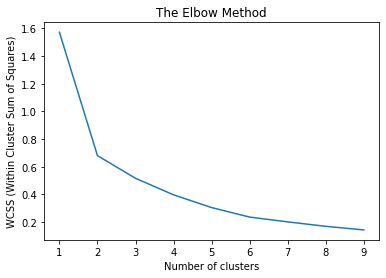

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0)
pred = kmeans.fit_predict(X)

In [ ]:
from sklearn import metrics
score1 = metrics.silhouette_score(X, kmeans.labels_, metric='euclidean')
print("Score of KMeans = ", score1)

Score of KMeans =  0.5282092767371109


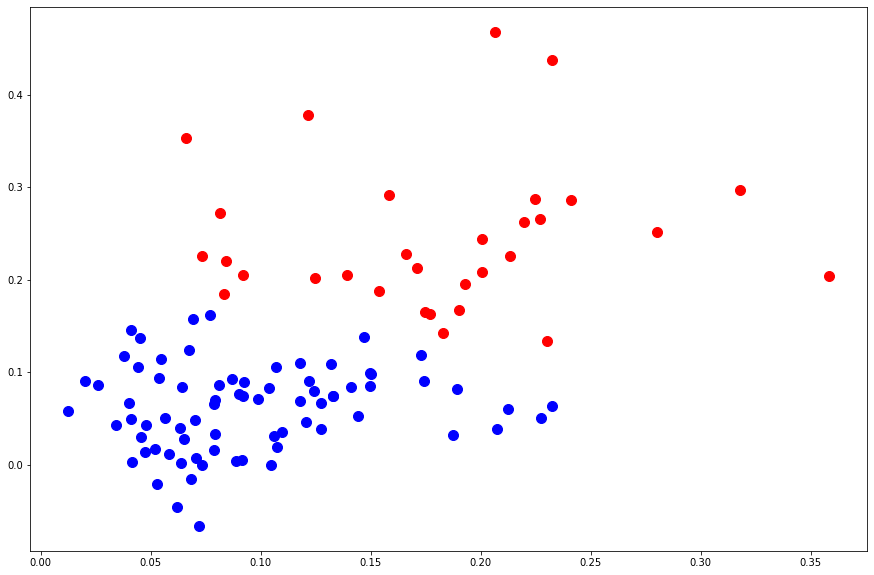

In [ ]:
# Visualising the clusters
plt.figure(figsize=(15,10))
plt.scatter(X[pred == 0,0], X[pred == 0,1], s = 100, c = 'red', label ='Cluster 1')
plt.scatter(X[pred == 1,0], X[pred == 1,1], s = 100, c = 'blue', label ='Cluster 2')

Hierarchical

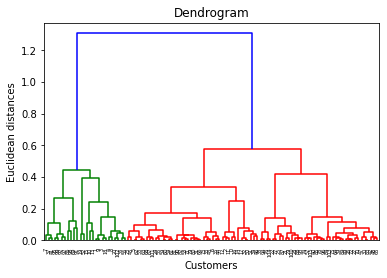

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')
y_hc = hc.fit_predict(X)
labels_agg = hc.labels_

In [ ]:
score_agg = metrics.silhouette_score(data,labels_agg)
print("Score of Agglomerative =", score_agg)

Score of Agglomerative = 0.3647554956260266


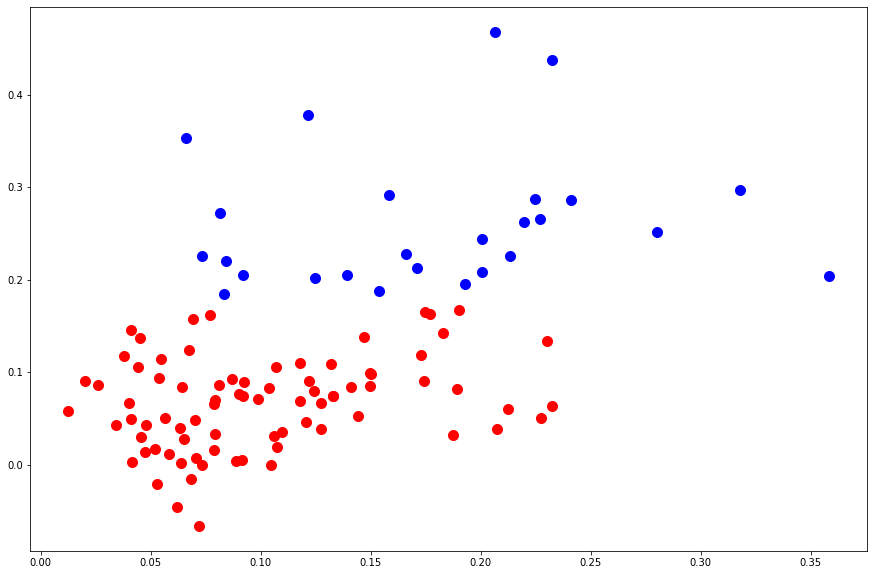

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label ='Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label ='Cluster 2')